What might the future developer workforce look like?
====================================================
**Morgan White**
Data Bootcamp, Spring 2016

Introduction
------------
Diversity, as a topic, has haunted technology companies and development teams for some time now. Their teams are notoriously white and male, in large part because this reflects the demographic of people who have traditionally been in these academic programs. 

However, this lack of diversity has been in the news a lot lately, [with major scandals at Google](http://time.com/3904408/google-workplace-diversity/ "Title"). There are many programs encouraging minority and female participation in STEM programs, and it feels like perhaps the next generation of developers will start to look more like the population of the world. 

..Or will it? 

In [100]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
from pandas_datareader import data, wb         

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 4.0.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.18.0
Plotly version:  1.9.7
Today:  2016-05-14


Data
----
**2013 National AP Exams**
I thought a natural starting point was to ask the question: how are current students buying into the existing education programs, and what do those demographics look like over the years? 

It turns out the AP exam for Computer Science only became available a few years ago, but [the engagement numbers and related demographic information](http://home.cc.gatech.edu/ice-gt/556 "Title) is freely available. 



In [101]:
url = 'http://home.cc.gatech.edu/ice-gt/uploads/556/DetailedStateInfoAP-CS-A-2006-2013-with-PercentBlackAndHIspanicByState-fixed.xlsx'
ap0 = pd.read_excel(url, sheetname=1, skiprows=[51, 52, 53, 54, 55], header=0)
ap0.shape

(50, 29)

In [181]:
ap = ap0.drop("Unnamed: 2", 1)
ap = ap.replace({"":0,"*":0})
ap['# male']=ap["Total #"]-ap["# female"]
ap['# male passed']=ap['# passed']-ap['# female passed']
ap['% fem passed']=ap["# female passed"]/ap["# female"]
ap["% male passed"]=ap["# male passed"]/ap["# male"]
ap.set_index("2013 data")
ap.head()

,2013 data,# schools,Total #,yield per teacher,# passed,% passed,# female,# female passed,% female passed,%female,...,# Hispanic Females,# Hispanic Females passed,% Hispanic females passed,% hispanic taking exam,% Hispanic in state,% taking / % state * 100,# male,# male passed,% fem passed,% male passed
0,California,211,4964,23.526066,3761.0,75.765512,1074,776,72.253259,21.635778,...,82,24*,29.27*,7.896857,37.6,21.002280,3890,2985.0,0.722533,0.767352
1,Texas,271,3979,14.682657,2454.0,61.673787,910,520,57.142857,22.870068,...,178,56*,31.46*,18.874089,37.6,50.197045,3069,1934.0,0.571429,0.630173
2,New York,124,1858,14.983871,1278.0,68.783638,377,216,57.294430,20.290635,...,45,10,22.2222,8.073197,17.6,45.870437,1481,1062.0,0.572944,0.717083
3,Virginia,110,1655,15.045455,1074.0,60.371517,308,207,67.207792,18.610272,...,9,2*,0,5.438066,7.9,68.836284,1347,867.0,0.672078,0.643653
4,Maryland,112,1629,14.544643,1068.0,65.561694,323,190,58.823529,19.828115,...,18,6*,0,5.402087,8.2,65.879112,1306,878.0,0.588235,0.672282


Analysis
========

How many women are taking the AP Computer Science exam? 
------

Before we can start to understand what helps women achieve in this field, we should understand how they are represented. Below we've taken a look by state at how women are represented in the overall test taking population. 

We see that women remain extremely underrepresented. Even in states like California and Texas, where participation in the exam is relatively high, women still max out at around 25% of total test takers. We see extremely low numbers after that.

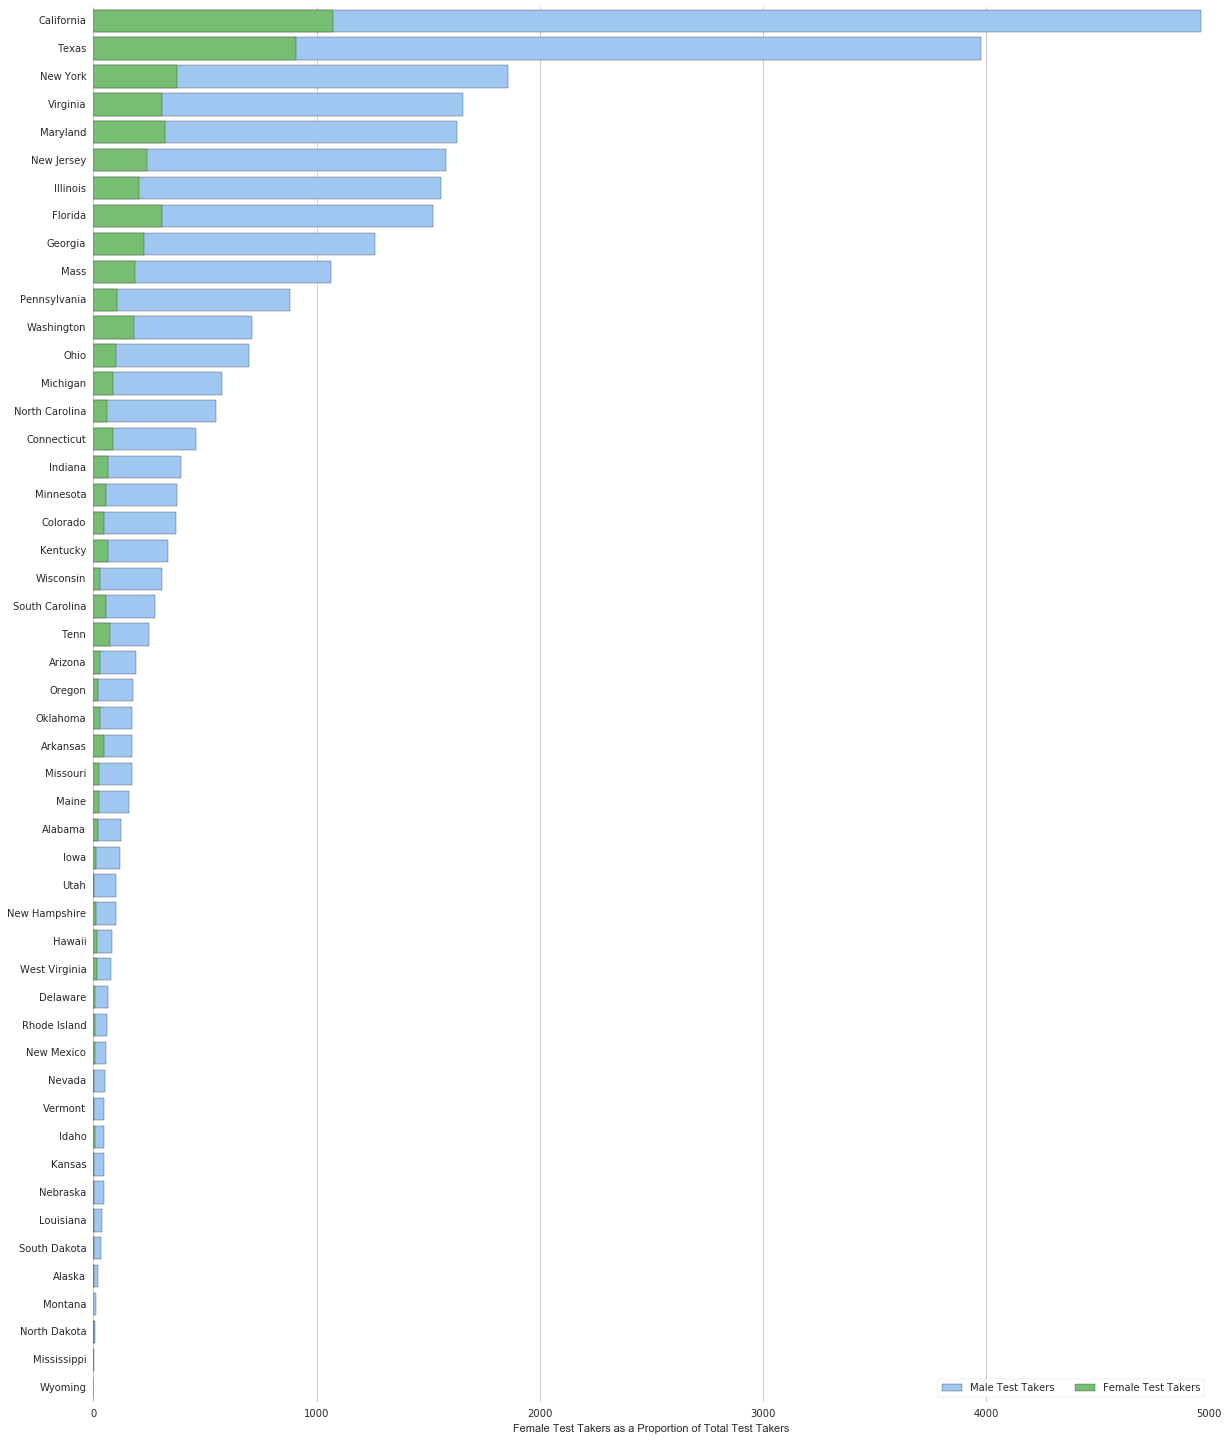

In [163]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20,25))

sns.set_color_codes("pastel")
sns.barplot(x="Total #", y="2013 data", data=ap,
            label="Male Test Takers", color="b")
sns.set_color_codes("muted")
sns.barplot(x="# female", y="2013 data", data=ap,
            label="Female Test Takers", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Female Test Takers as a Proportion of Total Test Takers")
sns.despine(left=True, bottom=True)


Does size matter: is there a relationship between the number of men/women taking the test and their pass rates?
----

On the whole, based on the results of the analysis below, it is safe to say that having more people in your state take the exam does not greatly impact the rate in which people pass. 

However, this analysis also shows that, as a cohort, women are being slightly outperformed by men. Is there a bias in the AP exam or coursework? Are women not finding resources they need as readily? That is not clear from the data, but the performance here is a huge concern. If women are not doing as well on the AP exam for some reason, are they more likely to drop out instead of improve? 

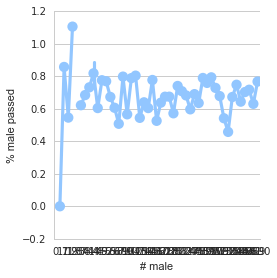

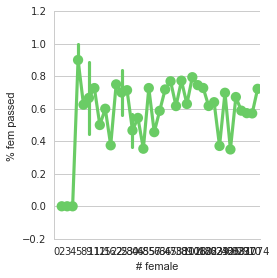

In [194]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.factorplot(x="# male", y="% male passed", data=ap,
            label="Male Test Takers", color="b")
sns.set_color_codes("muted")
sns.factorplot(x="# female", y="% fem passed", data=ap,
            label="Female Test Takers", color="g")


Do clusters of CompSci programs in a state make female participation more likely?
--------

Is there a correlation between the number of schools with Computer Science programs and women participating in the program?

From the analysis below, it's clear that a higher concentration of schools in each state correlates to a higher participation rate in women. It's not clear if this is because interest in general might be higher, or states with higher concentrations of these programs are actually helping to encourage women to participate. 

Further, this is not a guarantee, as there are states with high concentrations of programs not breaking the 400 women ceiling.  

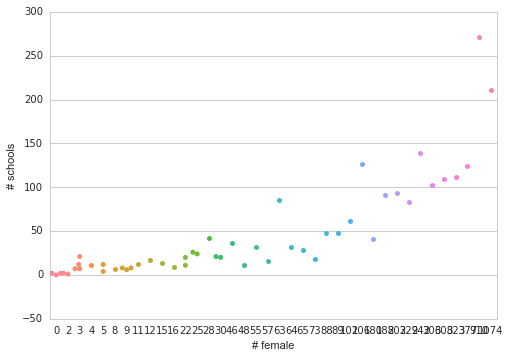

In [164]:
ap1= sns.swarmplot(y="# schools", x="# female", data=ap, split = True)
fig_cluster = ap1.get_figure()

Do larger or smaller classes encourage female participation better? 
----

From the analysis below, it seems as though, once class size exceeds 10, female participation is much higher. Like much of the analysis in this document, it is not clear whether female participation is higher because overall demand is higher in some states than others (hence the larger classes), or if larger classes encourage female participation (easier to blend in, etc.)

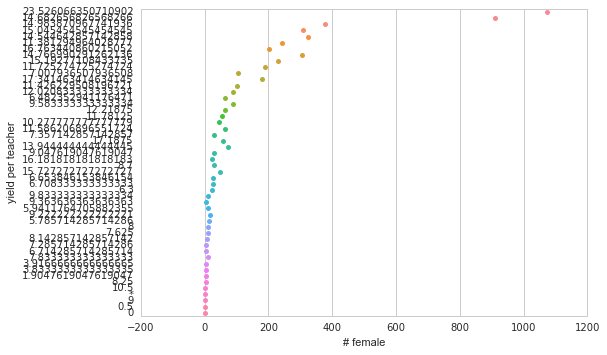

In [165]:
ap2= sns.swarmplot(y="yield per teacher", x="# female", data=ap, split = True)
fig_cluster = ap1.get_figure()

Girl Power: Does having girlfriends with you increase women's odds of passing?
---

States have a lot of variability in encouraging female participation in the Computer Science AP Exam, and in getting higher rates of women to pass the AP exam. It's clear that living in California gains you the best odds of being a female who took and passed the exam. As this exam is administered for another 4 or 5 years, and more schools start administering it, we may see these rates increase. 

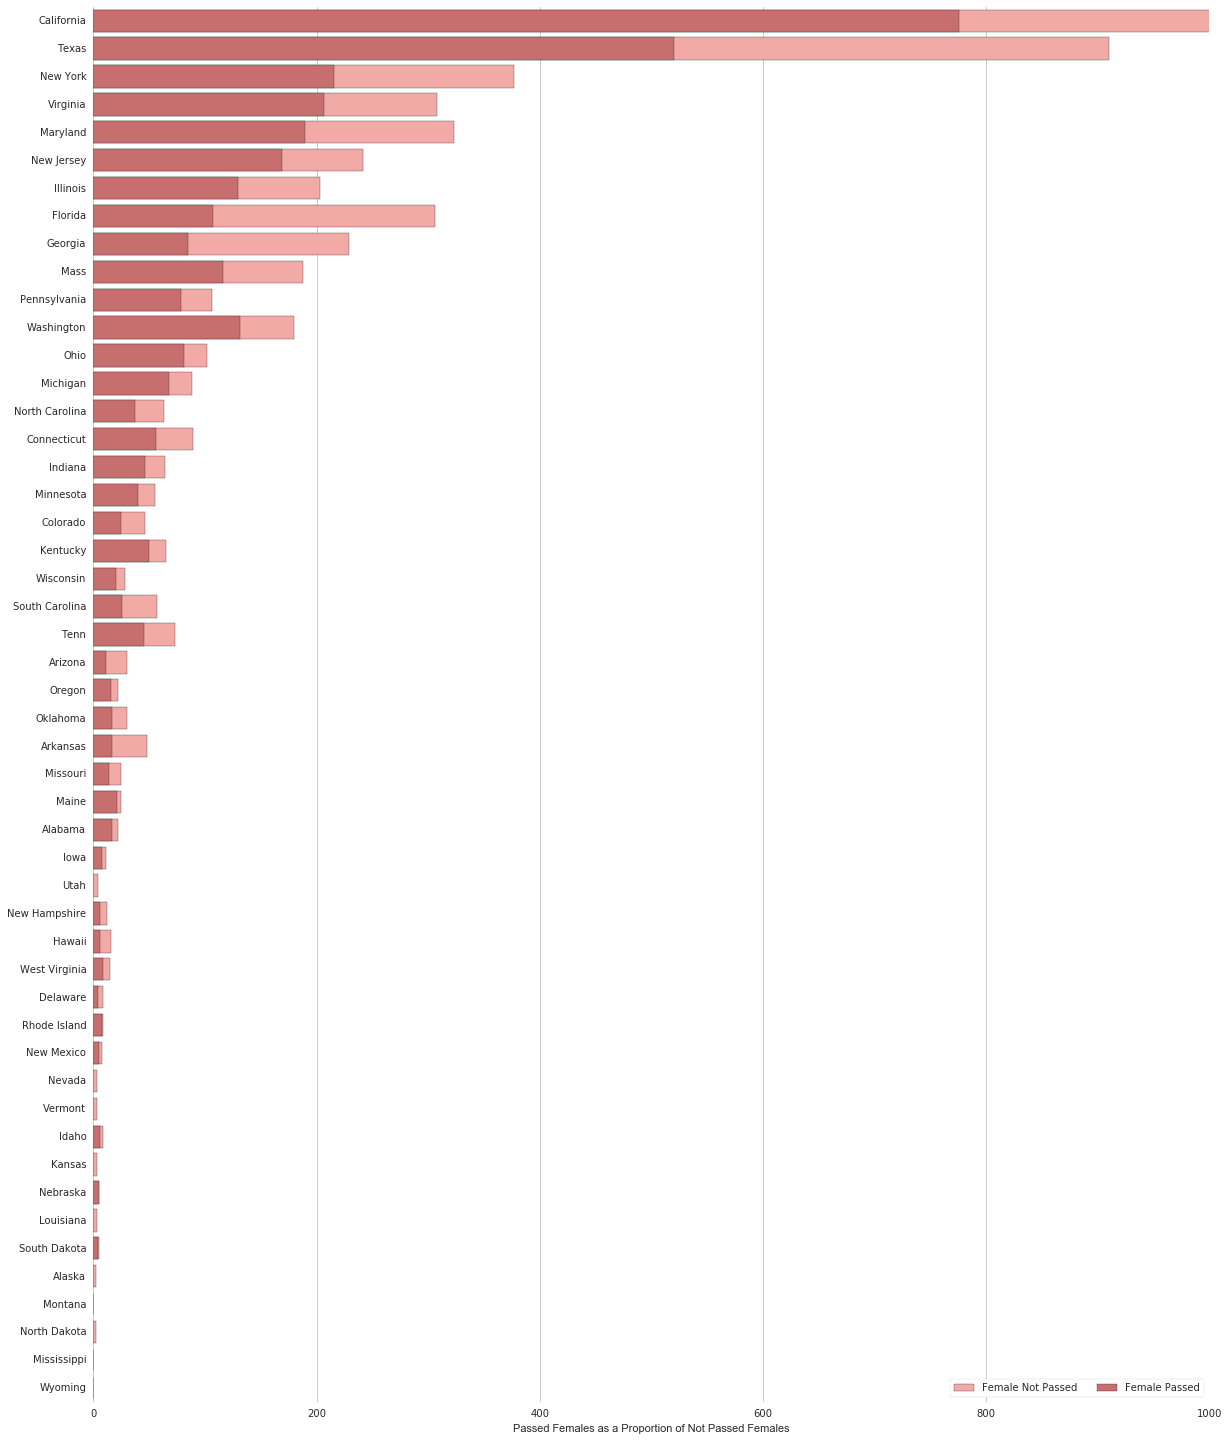

In [175]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20,25))

sns.set_color_codes("pastel")
sns.barplot(x="# female", y="2013 data", data=ap,
            label="Female Not Passed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="# female passed", y="2013 data", data=ap,
            label="Female Passed", color="r")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",
       xlabel="Passed Females as a Proportion of Not Passed Females")
sns.despine(left=True, bottom=True)

Good news, bad news
-----

Being a young woman in Computer Science is clearly a challenge. Fewer women than men are taking the exam, and they are passing it at lower rates than men as well. The increase in popularity of these programs will help bolster female participation: women seem to do better when states have more of these programs, and class size increases. This former Spice Girls fan would like to believe it's girl power - the more women participate, the higher the pass rates might be. However, that might be too idealistic. In reality, women need role models in these fields to encourage them to follow in these relatively new paths. 

The reality is that that generation of role models is taking flight today. Perhaps by the time this cohort reaches the workplace, they will indeed find those role models. Either way, diversity is a huge issue that every workplace is looking at. Encouraging women to pursue Computer Science ensures the field will incorporate a balance of perspectives, which is important for its long term success. 

Thank you for introducing me. It's been a wonderful journey; one I intend to continue! 